<font face='Calibri' size='2'> <i>eSBAE - Notebook Series - Part 5a, version 0.1, April 2023. Andreas Vollrath, UN-Food and Agricultural Organization, Rome</i>
</font>

![title](images/header.png)

# Va - Unsupervised Subsampling
### Run a KMeans unsupervised clustering algorithm to get a first set of *"statistically balanced"* training data
-------

This notebook takes you through the process of clustering your data points in an unsupervised fashion. From this you can select a subsample, which can serve as a basis for annotation. Data is exported as a CEO compatible file.
The reason why we use KMeans over a simple random selection is that we want to over-proportionally capture rare classes. For example, one of the clusters represents change events, but the cluster itself consists of only 1% of all samples. In a random selection of 100 points, only 1 point would be selected. If we choose 10 clusters and sample 10 points within each cluster, we assure that 10% of the samples are actually ‘change’. This is beneficial for subsequent steps of classifying, as we need a sufficient amount of samples for our rare classes (typically the ‘change’ class).
Determining the number of clusters is an iterative approach. The Statistic Plots will help to see if any cluster actually might capture forest change pre-dominantly. The number of points per cluster are determined by the overall amount of samples one is able to later interpret.

### 1 - Import libraries

This cell will provide us with the functionality we need for running the subsequent cells of the notebook.

In [1]:
from sampling_handler import KMeansSubSampling

/usr/local/share/jupyter/kernels/venv-eSBAE_notebooks/venv/lib/python3.10/site-packages/bfast/__init__.py:10: UserWarning: cupy is not available in this environment, GPU fonctionnalities won't be available
  warn("cupy is not available in this environment, GPU fonctionnalities won't be available")


### 2 - Basic Input Variables

Here a so called class instance is initialized. The class instance needs some parameters to be set and is written into the *esbae* variable. See the commented lines for further explanation.

In [3]:
esbae = KMeansSubSampling(

    # your project name (NEEDS to be consistent with previous notebooks of your project)
    project_name = 'esbae_project_Jan25',
    
    # select the number of clusters (reasonable numbers range from 5 to 30)
    clusters=10,
    
    # select the points per cluster (multiplied by the number fo cluster, will give you the overall number of samples ou will get)
    points_per_cluster=10,
    
    # a random state for reproducability (can be any integer number)
    random_state=25
)

INFO: Using existing project directory at /home/sepal-user/module_results/esbae/esbae_project_Jan25
INFO: Using existent config file from project directory /home/sepal-user/module_results/esbae/esbae_project_Jan25


### 3 - Run the clustering algorithm

The cluster algorithm shall be run with standardized inputs (e.g. all input variables are stadnardized to the same range). However, in certain cases, non standardized inputs may give better results. 

INFO: Aggregating files from dataset augmentation step
INFO: Using the following attributes as input for KMeans:
INFO: ['mon_images', 'bfast_magnitude', 'bfast_means', 'cusum_confidence', 'cusum_magnitude', 'bs_slope_mean', 'bs_slope_sd', 'bs_slope_max', 'bs_slope_min', 'ewma_jrc_change', 'ewma_jrc_magnitude', 'mosum_jrc_change', 'mosum_jrc_magnitude', 'cusum_jrc_change', 'cusum_jrc_magnitude', 'ccdc_magnitude', 'ndfi_mean', 'ndfi_sd', 'ndfi_min', 'ndfi_max', 'swir2_mean', 'swir2_sd', 'swir2_min', 'swir2_max', 'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max', 'nir_mean', 'nir_sd', 'nir_min', 'nir_max', 'red_mean', 'red_sd', 'red_min', 'red_max', 'brightness_mean', 'brightness_sd', 'brightness_min', 'brightness_max', 'wetness_mean', 'wetness_sd', 'wetness_min', 'wetness_max', 'greenness_mean', 'greenness_sd', 'greenness_min', 'greenness_max', 'gfc_tc00', 'dw_class_mode', 'dw_tree_prob__max', 'dw_tree_prob__min', 'dw_tree_prob__stdDev', 'dw_tree_prob_mean', 'elevation', 'slope', 'aspec

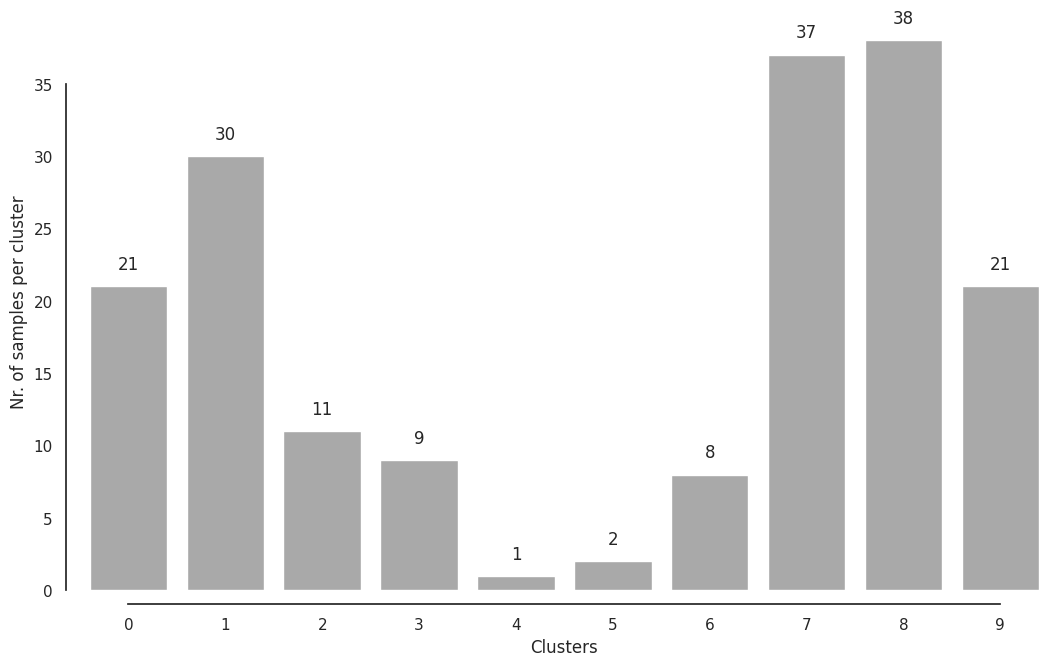

In [4]:
esbae.cluster(standardize_inputs=True)

### 4 - Plot the clusters on a map

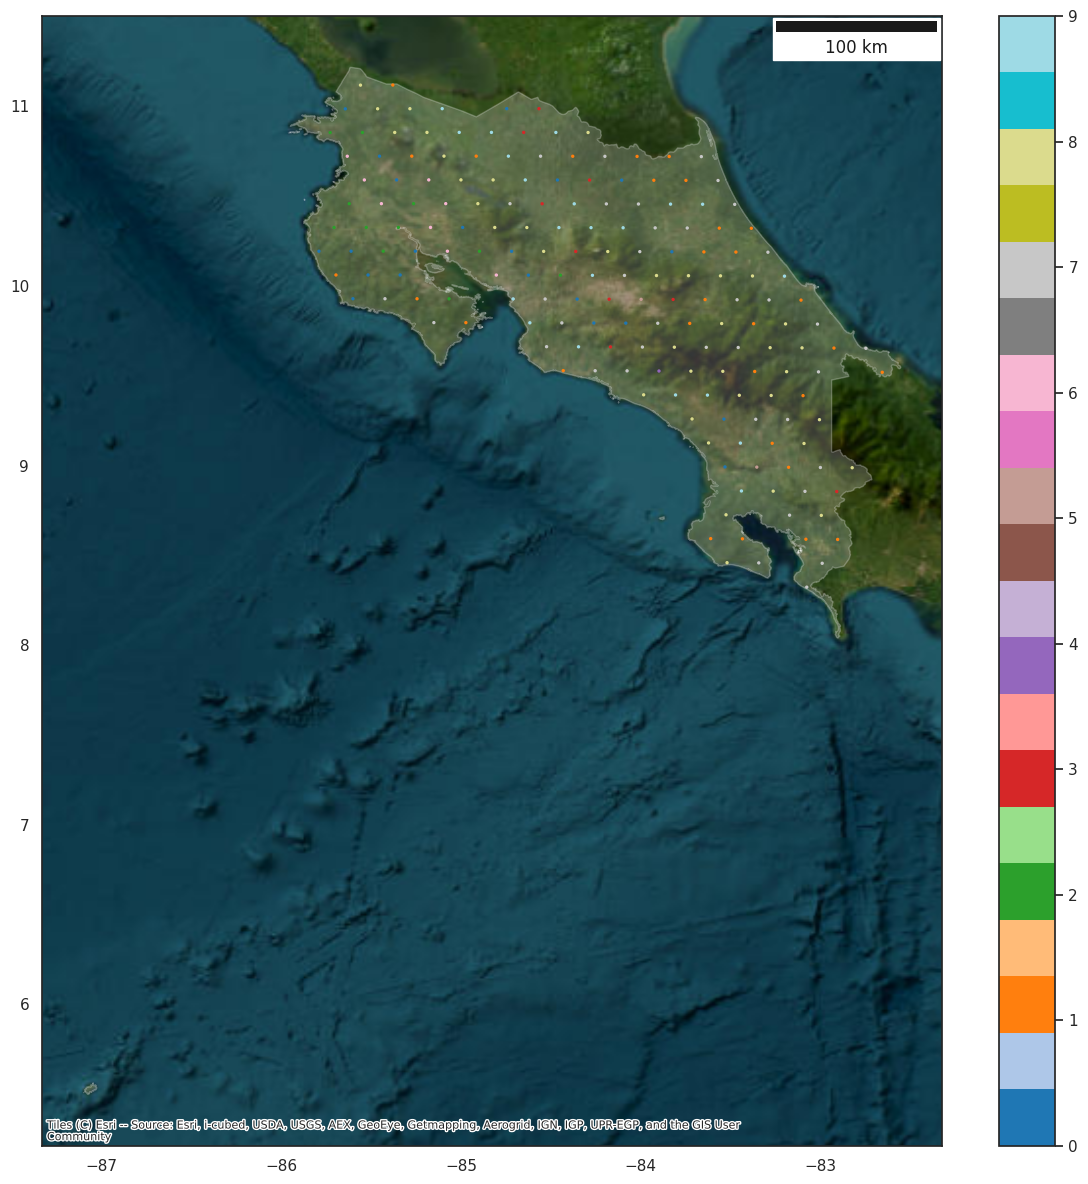

In [5]:
import contextily as cx
esbae.plot_clusters(markersize=2, basemap=cx.providers.Esri.WorldImagery) #check other basemaps here: https://contextily.readthedocs.io/en/latest/intro_guide.html

### 5 - Plot the clusters against the input variables to get an idea of what they represent

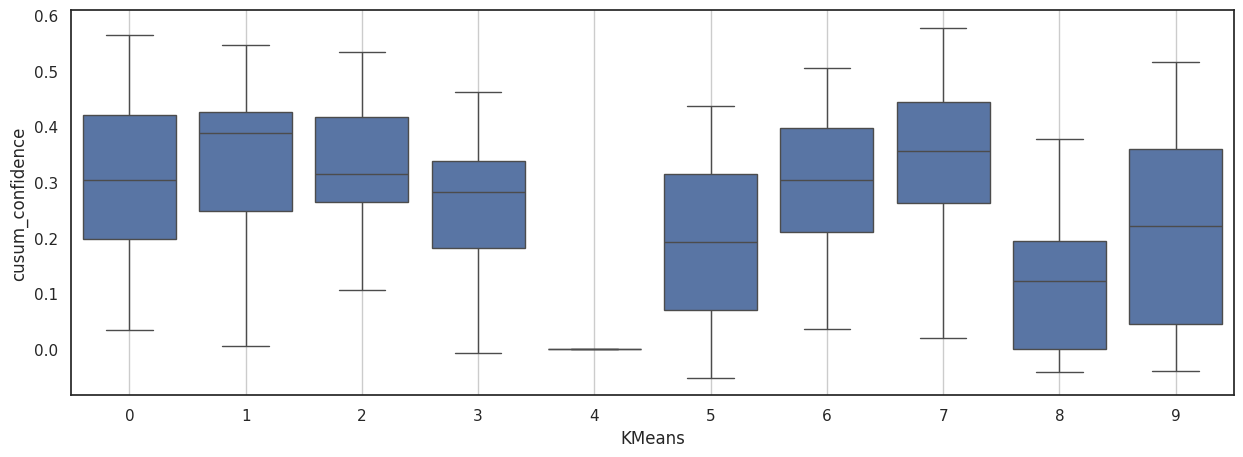

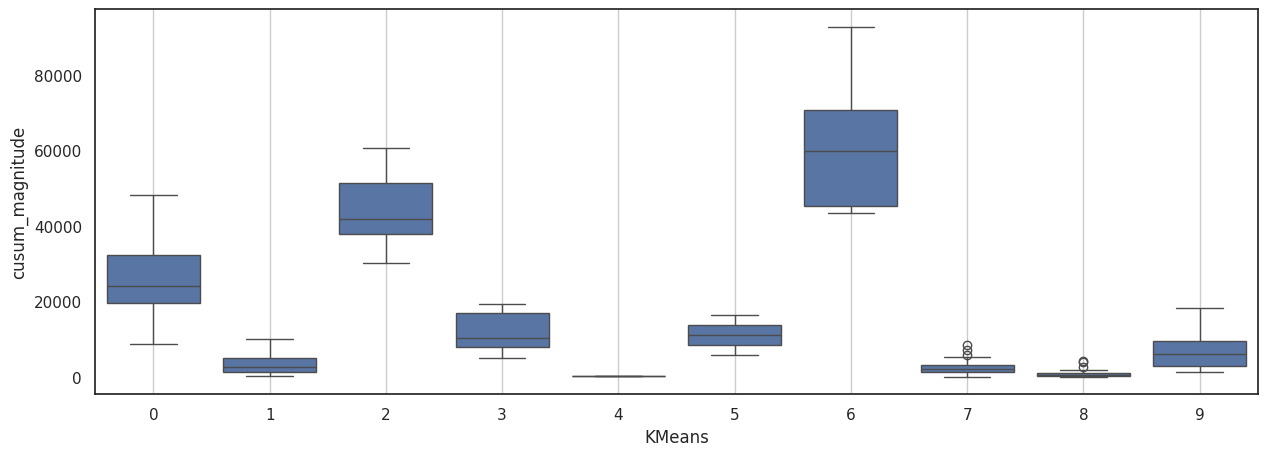

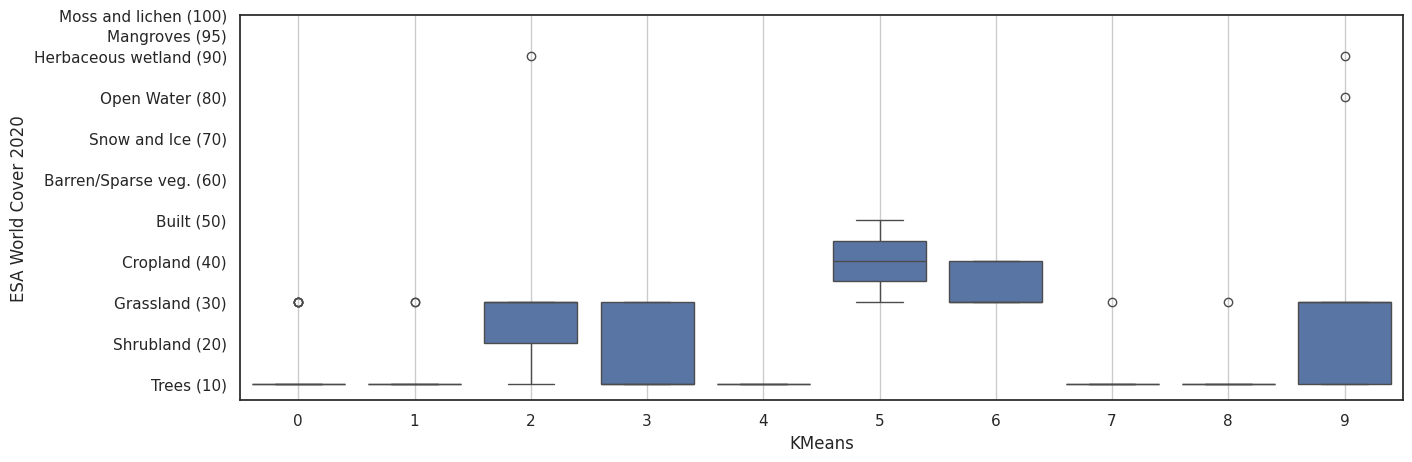

In [6]:
esbae.plot_stats(class_column='KMeans', cols_to_plot=['cusum_confidence', 'cusum_magnitude', 'esa_lc20'])

### 6 - Subsampling

This step subsamples each cluster by the amount of points per cluster defined during the initialization step in cell 2. There are 2 ways of selecting the subset, one is *randomly* and the other uses a *space filling curve* based on the Hilbert distance. 

The output can be saved as CEO. A csv file with point coordinates is created. In adidtion, a zipped shapefile is created as well. In case in Notebook 3, the bounds_reduce option has been used, the polygons of the reducer are taken as geometry.

In [7]:
esbae.sampling_type = 'space_filling_curve'  # or 'random'
esbae.select_samples(save_as_ceo=True)

INFO: 80 samples have been selected in total
INFO: Saving CEO compatible zipped shapefile samples to /home/sepal-user/module_results/esbae/esbae_project_Jan25/05_Subsampling/KMeans_Unsupervised/samples.zip
INFO: Saving CEO compatible file of sample centroids to /home/sepal-user/module_results/esbae/esbae_project_Jan25/05_Subsampling/KMeans_Unsupervised/samples.csv


### 7 - Plot subsample selection on a map

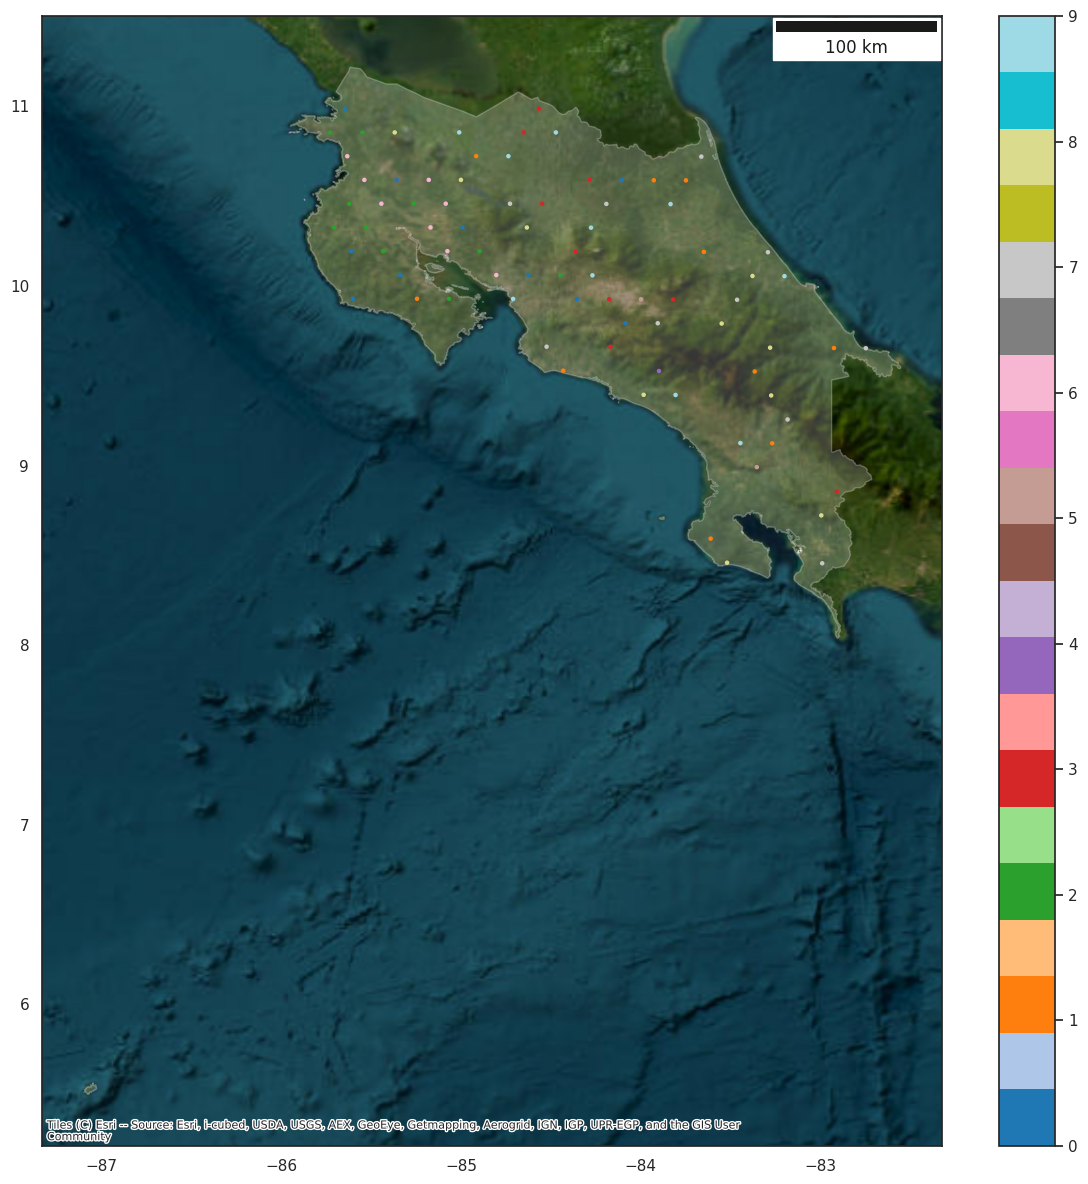

In [8]:
esbae.plot_samples(markersize=5, basemap=cx.providers.Esri.WorldImagery)